<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

#### Import the necessary libraries

In [33]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [34]:
keras.backend.backend()

'tensorflow'

#### Load and split MNIST for training and testing

In [35]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

###### Model configuration

In [36]:
model = keras.Sequential([
    # input layer with 784 neurons 
    keras.layers.Flatten(input_shape=(28,28)),
    # first hidden layer with 64 neurons
    keras.layers.Dense(64, activation='relu'), 
    # second hidden layer with 64 neurons
    keras.layers.Dense(64, activation='relu'), 
    # Output layer with 10 neurons
    keras.layers.Dense(10, activation='sigmoid')
])

###### Define TensorBoard call

In [37]:
tb_callback1 = tf.keras.callbacks.TensorBoard(log_dir="logs/SGD", histogram_freq = 1)
tb_callback2 = tf.keras.callbacks.TensorBoard(log_dir="logs/adam", histogram_freq = 1)

##### Model summary

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

###### Training the model

In [40]:
X_train_Norm = X_train / 255
X_test_Norm = X_test / 255
# we did not flatten separately

In [41]:
model.fit(X_train_Norm, y_train, epochs = 5, callbacks=[tb_callback2])

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2908 - accuracy: 0.9152
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1310 - accuracy: 0.9607
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0951 - accuracy: 0.9707
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0734 - accuracy: 0.9773
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0608 - accuracy: 0.9806


###### Testing the model

In [42]:
model.evaluate(X_test_Norm, y_test)

313/313 [==============================] - 0s 872us/step - loss: 0.0968 - accuracy: 0.9713


[0.09677869081497192, 0.9713000059127808]

In [43]:
y_predicted = model.predict(X_test_Norm)

###### Confusion matrix

Convert the predicted probabilities into actual class labels to contruct confusion matrix

In [44]:
y_predicted[:5]

array([[3.5532713e-03, 2.7196857e-01, 7.9936683e-01, 9.2254382e-01,
        3.2541156e-04, 5.6684554e-02, 1.8293449e-08, 9.9996221e-01,
        1.3550407e-01, 8.9128697e-01],
       [5.4923181e-05, 9.9703318e-01, 9.9999833e-01, 9.4512653e-01,
        2.5930603e-06, 4.6598577e-01, 9.9460718e-05, 7.3687806e-06,
        5.3268814e-01, 1.1277267e-06],
       [5.2127242e-04, 9.9970299e-01, 5.0610471e-01, 4.7332346e-02,
        1.1319500e-01, 7.7161372e-02, 7.1159303e-03, 4.8617336e-01,
        4.5001844e-01, 8.2076788e-03],
       [9.9994457e-01, 7.7732235e-02, 7.4523568e-01, 2.1209568e-02,
        1.2608171e-03, 6.3451409e-02, 7.2523177e-01, 4.1320920e-04,
        3.0660331e-03, 6.0409504e-01],
       [3.3320653e-01, 9.6383691e-04, 6.4565897e-01, 1.7277598e-03,
        9.9998778e-01, 2.5796890e-04, 1.3047457e-03, 9.6184361e-01,
        4.4617146e-02, 9.9950278e-01]], dtype=float32)

In [45]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [46]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    1,    0,    2,    0,    0,    1,    0,    1,    2],
       [   0, 1124,    4,    3,    0,    1,    1,    1,    1,    0],
       [   5,    1, 1011,    7,    1,    0,    0,    5,    2,    0],
       [   0,    0,    2, 1001,    0,    0,    0,    2,    1,    4],
       [   0,    2,    9,    0,  940,    2,    2,    1,    2,   24],
       [   3,    0,    2,   28,    0,  847,    3,    2,    3,    4],
       [   7,    3,    1,    2,    7,    5,  925,    2,    5,    1],
       [   1,    8,   16,    3,    1,    0,    0,  983,    0,   16],
       [   3,    1,    5,   15,    3,    6,    1,    3,  930,    7],
       [   6,    5,    0,    8,    6,    3,    0,    1,    1,  979]])>

Plot this matrix

Text(69.0, 0.5, 'Truth')

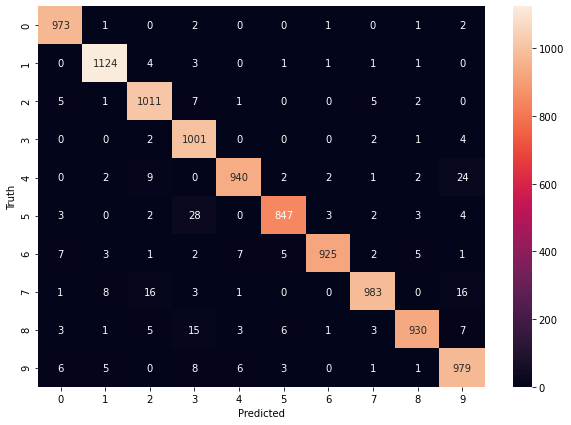

In [47]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')